In [1]:
pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
!pip install tensorflow_decision_forests==1.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 27.1 MB/s eta 0:00:00


In [3]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking long

In [4]:
!tensorflowjs_converter --version

2024-12-11 17:11:22.188886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 17:11:22.188979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 17:11:22.198960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 17:11:22.227365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-11 17:11:26.600232: W tensorflow/compiler/tf2

In [5]:
pip install nltk

In [6]:
import nltk
import json
import pickle
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt

In [7]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving intents.json to intents.json


In [10]:
with open('intents.json') as file:
    intents = json.load(file)

In [11]:
words = []
classes = []
documents = []
ignore_words = ['?', '!', '.', ',']

In [12]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [13]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

In [14]:
classes = sorted(list(set(classes)))

In [15]:
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

print(f"Words: {len(words)} unique lemmatized words.")
print(f"Classes: {len(classes)} classes.")

Words: 204 unique lemmatized words.
Classes: 34 classes.


In [16]:
training_sentences = []
training_labels = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in doc[0]]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training_sentences.append(bag)
    training_labels.append(output_row)

train_x = np.array(training_sentences)
train_y = np.array(training_labels)

In [17]:
indices = np.arange(len(train_x))
np.random.shuffle(indices)
train_x = train_x[indices]
train_y = train_y[indices]

print("Training data siap.")

Training data siap.


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(len(train_x[0]),)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))

adam = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

hist = model.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1)

model.save('chatbot_model.h5')

final_loss = hist.history['loss'][-1]
final_accuracy = hist.history['accuracy'][-1]

print(f"Final Loss: {final_loss}")
print(f"Final Accuracy: {final_accuracy}")

Epoch 1/200
20/20 [==============================] - 1s 3ms/step - loss: 4.1776 - accuracy: 0.0505
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 3.3775 - accuracy: 0.1616
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 3.0917 - accuracy: 0.1414
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 2.6569 - accuracy: 0.2424
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 2.3230 - accuracy: 0.3232
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 2.5120 - accuracy: 0.2525
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 2.2688 - accuracy: 0.3232
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 2.2264 - accuracy: 0.3737
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 1.9932 - accuracy: 0.4646
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 2.1702 - accuracy: 0.3535
Epoch 11/

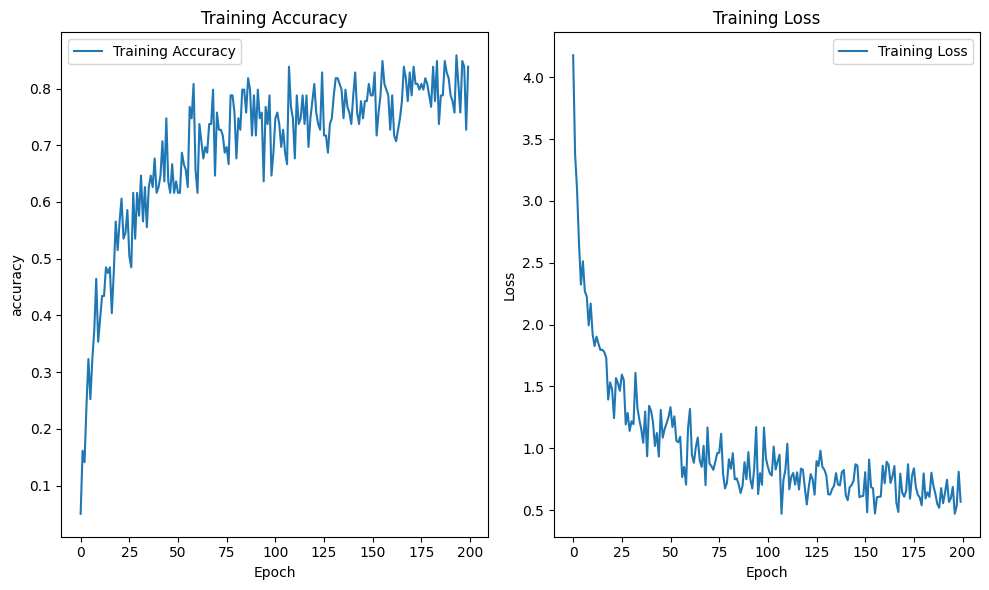

In [31]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.tight_layout()
plt.show()

In [32]:
from tensorflow.keras.models import load_model
import json
import random
import nltk
import pickle

model = load_model('chatbot_model.h5')

intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl', 'rb'))
classes = pickle.load(open('classes.pkl', 'rb'))

def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(w.lower()) for w in sentence_words]
    return sentence_words

def bow(sentence, words):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
    return np.array(bag)

def predict_class(sentence, model):
    p = bow(sentence, words)
    p = np.array([p])
    prediction = model.predict(p, verbose=0)
    return prediction

def get_response(prediction, intents):
    index = np.argmax(prediction)
    tag = classes[index]

    for intent in intents['intents']:
        if intent['tag'] == tag:
            return random.choice(intent['responses'])

def chatbot_response(msg):
    prediction = predict_class(msg, model)
    response = get_response(prediction, intents)
    return response

In [33]:
def chat_terminal():
    print("Chatbot is ready! Type 'exit' to quit.")

    while True:
        user_input = input("Kamu: ")
        if user_input.lower() == 'exit':
            break
        elif user_input.lower() == 'patterns':
            print("Available responses:")
            for intent_data in intents["intents"]:
                print(f"- {intent_data['tag']}")
        else:
            response = chatbot_response(user_input)
            print(f"BeatWell: {response}")

if __name__ == "__main__":
    chat_terminal()

Chatbot is ready! Type 'exit' to quit.
Kamu: hi
BeatWell: Hai! Ada yang bisa saya bantu hari ini?
Kamu: halo
BeatWell: Halo, bagaimana saya bisa membantu menjaga kesehatan jantung Anda?
Kamu: assalamualaikum
BeatWell: Waalaikumsalam
Kamu: pagi
BeatWell: Selamat pagi! Semoga harimu menyenangkan.
Kamu: saya sering nyeri dada setelah aktivitas berat, apakah itu berbahaya?
BeatWell: Kalau sesak napas hanya terjadi karena kurang latihan, perbaiki kebugaran dulu. Kalau tetap muncul, baru periksa.
Kamu: olahraga apa yang baik untuk kesehatan jantung?
BeatWell: Olahraga dengan teratur setiap hari, minimal 30 menit per hari atau 150 menit per minggu untuk meningkatkan elastisitas pada pembuluh darah
Kamu: apakah stres berpengaruh pada kesehatan jantung?
BeatWell: Stres kronis bisa mempengaruhi kesehatan jantung, jadi penting untuk menjaga kesehatan mental dengan cara relaksasi dan olahraga.
Kamu: terimakasih
BeatWell: Saya belum mengerti pertanyaan Anda, coba tanya lagi dengan cara lain.
Kamu: 

In [34]:
import tensorflowjs as tfjs

In [35]:
tfjs.converters.save_keras_model(model, 'tfjs_model')

In [36]:
# prompt: convert pickle files to json

import pickle
import json

def convert_pickle_to_json(pickle_file, json_file):
    """Converts a pickle file to a JSON file.

    Args:
        pickle_file: Path to the pickle file.
        json_file: Path to the output JSON file.
    """
    try:
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)
        with open(json_file, 'w') as f:
            json.dump(data, f, indent=4)  # Use indent for pretty printing
        print(f"Successfully converted {pickle_file} to {json_file}")
    except (FileNotFoundError, pickle.UnpicklingError) as e:
        print(f"Error converting {pickle_file}: {e}")

# Example usage:
convert_pickle_to_json('words.pkl', 'words.json')
convert_pickle_to_json('classes.pkl', 'classes.json')

Successfully converted words.pkl to words.json
Successfully converted classes.pkl to classes.json


In [37]:
import json
import pickle

def convert_json_to_pickle(json_file, pickle_file):
    """Converts a JSON file to a pickle file.

    Args:
        json_file: Path to the JSON file.
        pickle_file: Path to the output pickle file.
    """
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
        with open(pickle_file, 'wb') as f:
            pickle.dump(data, f)
        print(f"Successfully converted {json_file} to {pickle_file}")
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Error converting {json_file}: {e}")

# Example usage:
convert_json_to_pickle('intents.json', 'intents.bin')


Successfully converted intents.json to intents.bin
